## GAUTAM MISHRA - Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('bmd_logistic_regression.csv')

In [4]:
df.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


###### Head gives top 5 record

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 9 columns):
id              169 non-null int64
age             169 non-null float64
sex             169 non-null object
fracture        169 non-null object
weight_kg       169 non-null float64
height_cm       169 non-null float64
medication      169 non-null object
waiting_time    169 non-null int64
bmd             169 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 12.0+ KB


###### This data contains 169 rowa and 9 columns with no null values

In [6]:
df.drop('id',axis=1,inplace=True)

###### We can drop the id column as we already have row id

In [7]:
df.dtypes

age             float64
sex              object
fracture         object
weight_kg       float64
height_cm       float64
medication       object
waiting_time      int64
bmd             float64
dtype: object

###### The above dataset contain 4 float,1 int and 3 object column

In [8]:
df.describe()

,age,weight_kg,height_cm,waiting_time,bmd
count,169.000000,169.000000,169.000000,169.000000,169.000000
mean,63.631531,64.665680,160.254438,19.739645,0.783104
std,12.356936,11.537171,7.928272,15.800570,0.166529
min,35.814058,36.000000,142.000000,5.000000,0.407600
25%,54.424211,56.000000,154.000000,9.000000,0.670800
50%,63.487837,64.500000,160.500000,14.000000,0.786100
75%,72.080558,73.000000,166.000000,24.000000,0.888800
max,88.753795,96.000000,177.000000,96.000000,1.362400


###### The column age,weight_kg,height_cm and bmd has mean=median i.e. the data is normally distributed

### Handling Age column

In [9]:
df['age'].unique()

array([57.05276775, 75.7412248 , 70.7789    , 78.24717531, 54.1918766 ,
       77.17775151, 56.18061769, 49.91613988, 68.40840332, 66.25664804,
       45.86658172, 73.97047074, 60.55541712, 64.2131031 , 53.3954402 ,
       66.82546218, 57.93459324, 40.23236742, 69.04817915, 57.80229798,
       58.19132915, 46.08154976, 65.79535204, 60.18946129, 54.99218408,
       51.43071736, 70.19857261, 77.15502036, 70.42187319, 75.01547985,
       54.91253353, 70.0285031 , 48.81687141, 49.78743656, 41.41761507,
       67.92438462, 60.8313568 , 62.71790768, 69.65373122, 81.47969034,
       73.23042708, 54.42421077, 66.64486617, 83.84773532, 67.65108105,
       82.42315923, 54.23390445, 42.81703317, 69.72844532, 76.8639147 ,
       43.45071208, 67.57338008, 56.20812741, 88.7537953 , 70.40792405,
       62.06523735, 61.18467166, 48.28948823, 49.73132379, 36.64831103,
       63.67318436, 74.17835572, 63.28728844, 56.95872053, 46.56490164,
       47.02465066, 84.78739433, 54.40617797, 51.59653972, 61.17

###### Age column contains value in float so we need to convert it into int as age cannot be float

In [10]:
df['age']

0      57.052768
1      75.741225
2      70.778900
3      78.247175
4      54.191877
         ...    
164    77.982543
165    50.285303
166    46.359721
167    54.788368
168    69.994822
Name: age, Length: 169, dtype: float64

In [11]:
df['age']=df['age'].astype('int')

In [12]:
df['age'].dtypes

dtype('int32')

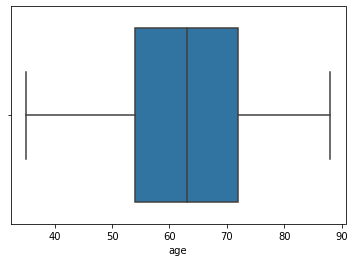

In [13]:
sns.boxplot(df['age'])

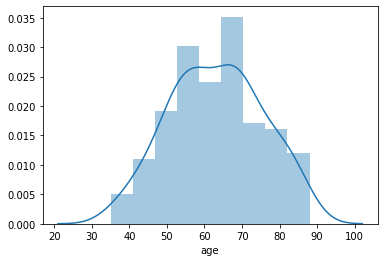

In [14]:
sns.distplot(df['age'])

###### The Age column is normally distributed

###### Handling other columns

In [15]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [16]:
df['fracture'].unique()

array(['no fracture', 'fracture'], dtype=object)

In [17]:
df['weight_kg'].unique()

array([64. , 78. , 73. , 60. , 55. , 65. , 77. , 59. , 72. , 62. , 68. ,
       76. , 90. , 70. , 67. , 66. , 50. , 74. , 75. , 67.5, 69. , 96. ,
       46. , 80. , 52. , 71. , 79. , 56. , 84. , 88. , 39. , 58. , 85. ,
       54. , 63. , 47. , 82. , 51. , 91. , 81. , 94. , 57. , 61. , 48. ,
       49. , 64.5, 40. , 37. , 36. , 41. , 45. , 68.5])

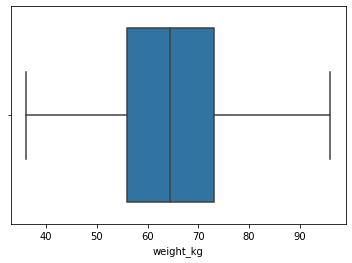

In [18]:
sns.boxplot(df['weight_kg'])

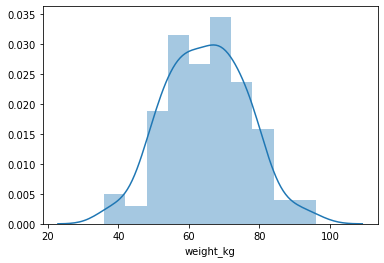

In [19]:
sns.distplot(df['weight_kg'])

###### Weight is normally distributed

In [20]:
df['height_cm'].unique()

array([155.5, 162. , 170.5, 148. , 161. , 168. , 159. , 150. , 167. ,
       159.5, 169. , 164. , 155. , 175. , 162.5, 171. , 160. , 165. ,
       154. , 152. , 145. , 153.5, 172. , 166. , 173.5, 170. , 153. ,
       163. , 156. , 151. , 164.5, 150.5, 148.5, 149. , 160.5, 158. ,
       165.5, 157. , 161.5, 176. , 177. , 168.5, 149.5, 175.5, 144. ,
       166.5, 163.5, 156.5, 146. , 151.5, 142. , 174. ])

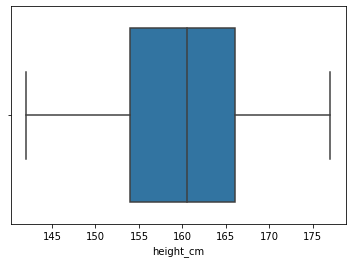

In [21]:
sns.boxplot(df['height_cm'])

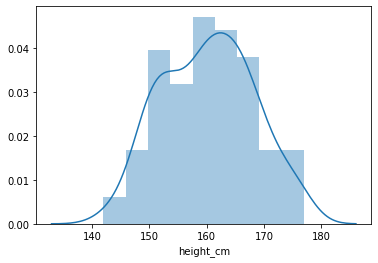

In [22]:
sns.distplot(df['height_cm'])

###### Height is normally distributed

In [23]:
df['medication'].unique()

array(['Anticonvulsant', 'No medication', 'Glucocorticoids'], dtype=object)

In [24]:
df['waiting_time'].unique()

array([18, 56, 10, 14, 20,  7, 26,  9,  6, 12,  5, 11, 28, 73, 13,  8, 21,
       37, 22, 64, 15, 17, 33, 23, 89, 25, 16, 19, 60, 34, 27, 24, 38, 29,
       39, 47, 30, 51, 40, 32, 31, 69, 35, 59, 96, 48, 49], dtype=int64)

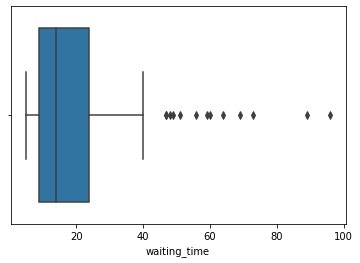

In [25]:
sns.boxplot(df['waiting_time'])

###### The waiting_time column contains null values

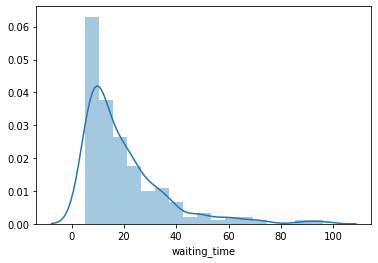

In [26]:
sns.distplot(df['waiting_time'])

###### Waiting_time column is right skewed data

###### Removing value greater than 45

In [27]:
df[df['waiting_time']>45]

,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
1,75,F,no fracture,78.0,162.0,No medication,56,0.7946
14,53,M,no fracture,70.0,162.5,No medication,73,0.8020
24,54,M,no fracture,75.0,172.0,No medication,64,0.8126
40,73,F,no fracture,52.0,153.0,No medication,89,0.7128
58,49,F,no fracture,72.0,160.5,No medication,60,0.9851
104,49,M,no fracture,66.0,157.0,No medication,47,0.7269
110,68,F,no fracture,49.0,144.0,No medication,51,0.7509
124,87,M,fracture,57.0,156.5,No medication,69,0.5387
135,72,F,fracture,50.0,154.0,No medication,47,0.6001
139,71,F,fracture,63.0,148.0,Glucocorticoids,59,0.4076


In [28]:
df

,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,57,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,75,F,no fracture,78.0,162.0,No medication,56,0.7946
2,70,M,no fracture,73.0,170.5,No medication,10,0.9067
3,78,F,no fracture,60.0,148.0,No medication,14,0.7112
4,54,M,no fracture,55.0,161.0,No medication,20,0.7909
...,...,...,...,...,...,...,...,...
164,77,M,fracture,74.0,164.0,No medication,49,0.7941
165,50,F,fracture,59.0,161.0,No medication,6,0.7971
166,46,M,fracture,67.0,169.0,No medication,10,0.8037
167,54,M,fracture,70.0,166.0,No medication,14,0.8072


In [29]:
df=df[df['waiting_time']<45]

In [30]:
df

,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,57,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
2,70,M,no fracture,73.0,170.5,No medication,10,0.9067
3,78,F,no fracture,60.0,148.0,No medication,14,0.7112
4,54,M,no fracture,55.0,161.0,No medication,20,0.7909
5,77,M,no fracture,65.0,168.0,No medication,7,0.7301
...,...,...,...,...,...,...,...,...
163,67,M,fracture,80.0,172.0,No medication,8,0.7745
165,50,F,fracture,59.0,161.0,No medication,6,0.7971
166,46,M,fracture,67.0,169.0,No medication,10,0.8037
167,54,M,fracture,70.0,166.0,No medication,14,0.8072


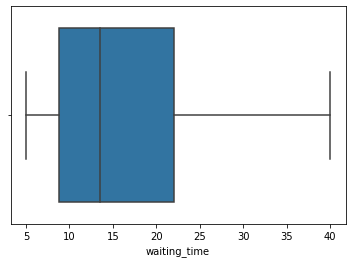

In [31]:
sns.boxplot(df['waiting_time'])

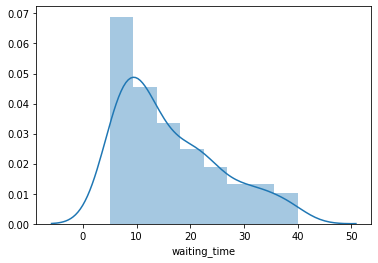

In [32]:
sns.distplot(df['waiting_time'])

###### Handling bmd column values

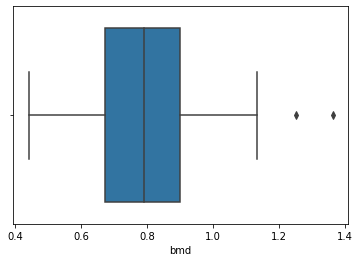

In [33]:
sns.boxplot(df['bmd'])

In [34]:
df[df['bmd']>1.2]

,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
48,69,M,no fracture,84.0,164.5,Glucocorticoids,13,1.3624
66,84,M,no fracture,68.0,165.0,No medication,11,1.2508


In [35]:
df=df[df['bmd']<1.2]

###### Removing outlier values

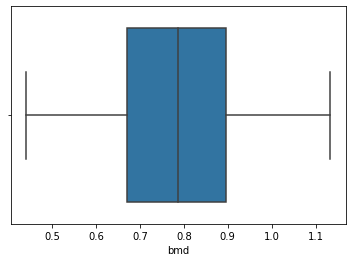

In [36]:
sns.boxplot(df['bmd'])

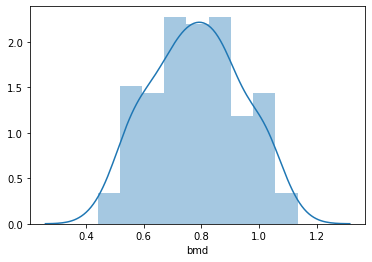

In [37]:
sns.distplot(df['bmd'])

###### The bmd is normally distributed

###### Converting target variable fracture and not fracture to 1 an 0 respectively

In [38]:
df['fracture']=df['fracture'].map({'fracture':1,'no fracture':0})

In [39]:
df

,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,57,F,0,64.0,155.5,Anticonvulsant,18,0.8793
2,70,M,0,73.0,170.5,No medication,10,0.9067
3,78,F,0,60.0,148.0,No medication,14,0.7112
4,54,M,0,55.0,161.0,No medication,20,0.7909
5,77,M,0,65.0,168.0,No medication,7,0.7301
...,...,...,...,...,...,...,...,...
163,67,M,1,80.0,172.0,No medication,8,0.7745
165,50,F,1,59.0,161.0,No medication,6,0.7971
166,46,M,1,67.0,169.0,No medication,10,0.8037
167,54,M,1,70.0,166.0,No medication,14,0.8072


##### Multivariate Analysis

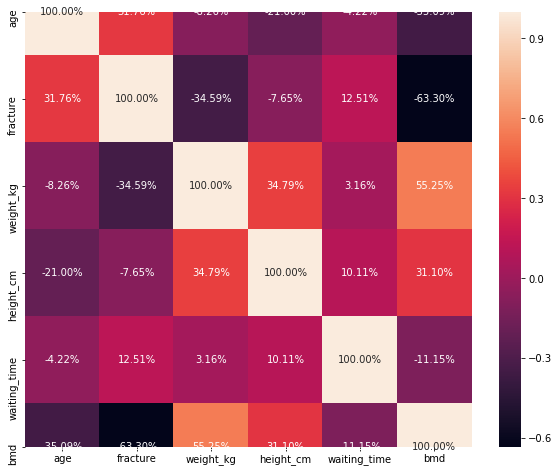

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='0.2%')

###### bmd is highly co-related to fracture

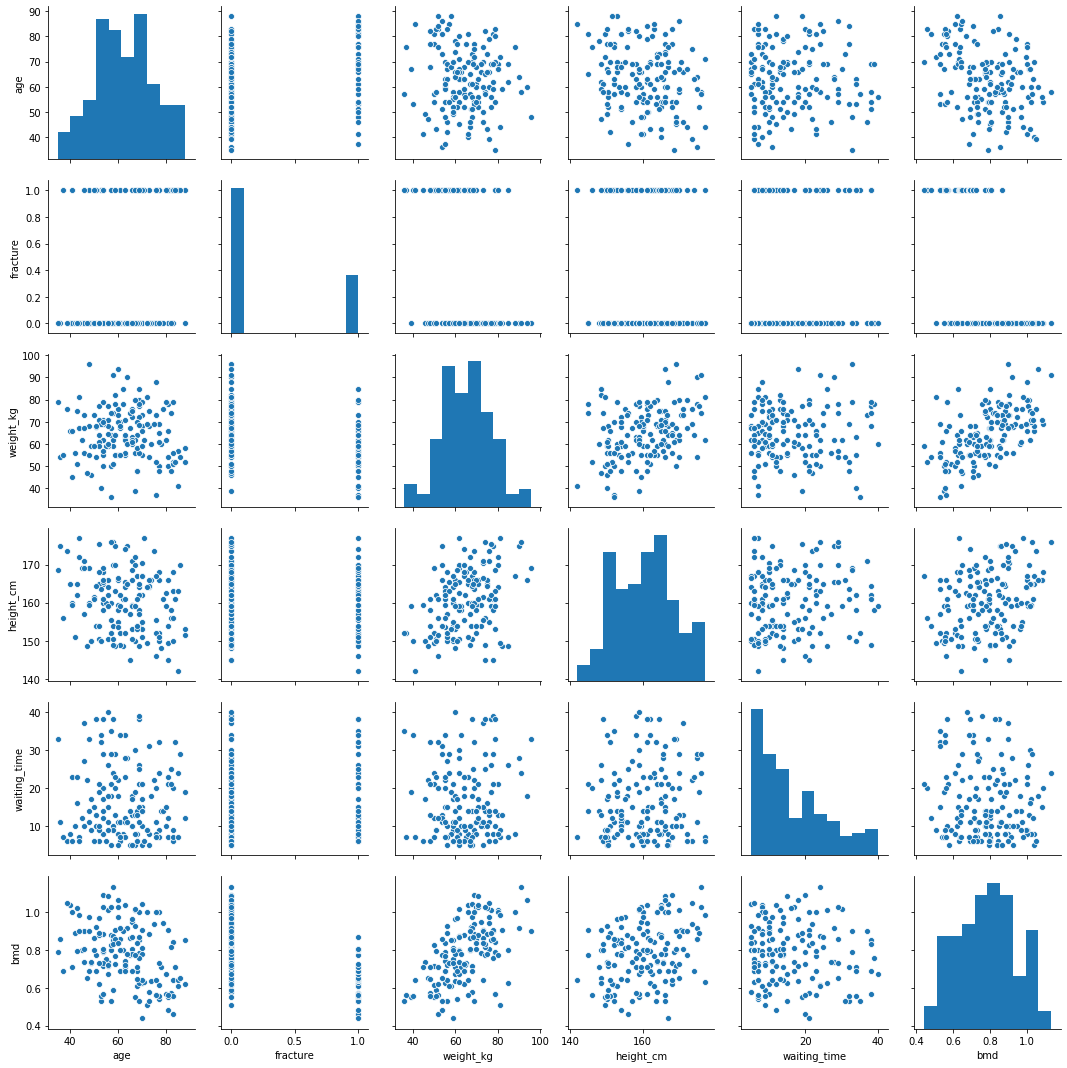

In [41]:
sns.pairplot(df)

### Target variable distribution

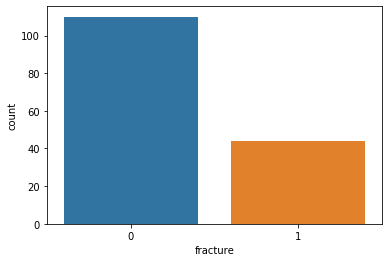

In [42]:
sns.countplot(df['fracture'])

#### Here,our target variable is imbalanced data

### Bivariate Analysis

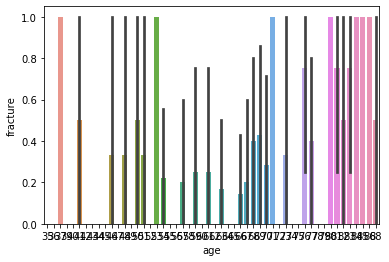

In [43]:
sns.barplot(df['age'],df['fracture'])

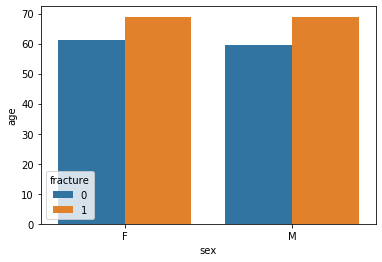

In [44]:
sns.barplot(df['sex'],df['age'],hue=df['fracture'],ci=False)

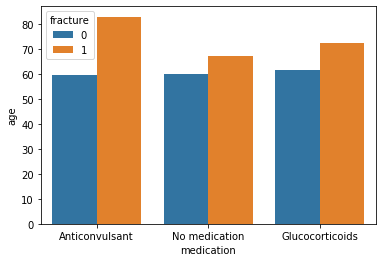

In [45]:
sns.barplot(df['medication'],df['age'],hue=df['fracture'],ci=False)

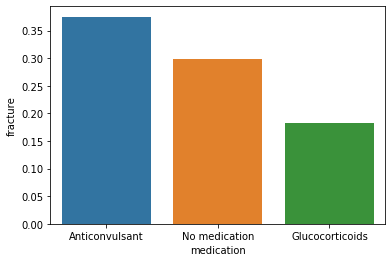

In [46]:
sns.barplot(df['medication'],df['fracture'],ci=False)

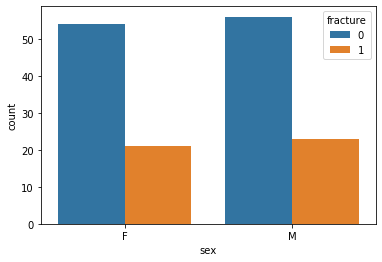

In [47]:
sns.countplot(df['sex'],hue=df['fracture'])

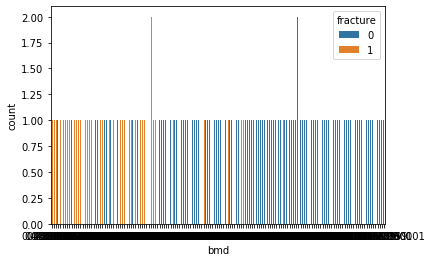

In [48]:
sns.countplot(df['bmd'],hue=df['fracture'])

<Figure size 1440x576 with 0 Axes>

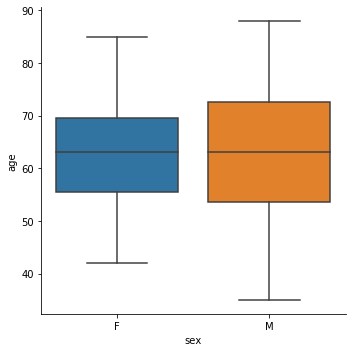

In [49]:
plt.figure(figsize=(20,8))
sns.catplot(x='sex',y='age',kind='box',data=df)

In [50]:
df.dtypes

age               int32
sex              object
fracture          int64
weight_kg       float64
height_cm       float64
medication       object
waiting_time      int64
bmd             float64
dtype: object

### Dividing numerical and categorical columns

In [51]:
num_col=df.select_dtypes(include=['int64','int32','float'])
num_col

,age,fracture,weight_kg,height_cm,waiting_time,bmd
0,57,0,64.0,155.5,18,0.8793
2,70,0,73.0,170.5,10,0.9067
3,78,0,60.0,148.0,14,0.7112
4,54,0,55.0,161.0,20,0.7909
5,77,0,65.0,168.0,7,0.7301
...,...,...,...,...,...,...
163,67,1,80.0,172.0,8,0.7745
165,50,1,59.0,161.0,6,0.7971
166,46,1,67.0,169.0,10,0.8037
167,54,1,70.0,166.0,14,0.8072


In [52]:
cat_col=df.select_dtypes(include='O')
cat_col

,sex,medication
0,F,Anticonvulsant
2,M,No medication
3,F,No medication
4,M,No medication
5,M,No medication
...,...,...
163,M,No medication
165,F,No medication
166,M,No medication
167,M,No medication


### Converting object sex from male to 1 and 0 for female 

In [53]:
df['sex']=df['sex'].map({'M':1,'F':0})

In [54]:
num_col=df.select_dtypes(include=['int64','int32','float'])
num_col

,age,sex,fracture,weight_kg,height_cm,waiting_time,bmd
0,57,0,0,64.0,155.5,18,0.8793
2,70,1,0,73.0,170.5,10,0.9067
3,78,0,0,60.0,148.0,14,0.7112
4,54,1,0,55.0,161.0,20,0.7909
5,77,1,0,65.0,168.0,7,0.7301
...,...,...,...,...,...,...,...
163,67,1,1,80.0,172.0,8,0.7745
165,50,0,1,59.0,161.0,6,0.7971
166,46,1,1,67.0,169.0,10,0.8037
167,54,1,1,70.0,166.0,14,0.8072


In [55]:
cat_col=df.select_dtypes(include='O')
cat_col

,medication
0,Anticonvulsant
2,No medication
3,No medication
4,No medication
5,No medication
...,...
163,No medication
165,No medication
166,No medication
167,No medication


### Encoding Techniques

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le=LabelEncoder()

In [58]:
df['medication']=LabelEncoder().fit_transform(df['medication'])

### Taking Independent variable ,feature(X)

In [59]:
X=df.drop('fracture',axis=1)
X

,age,sex,weight_kg,height_cm,medication,waiting_time,bmd
0,57,0,64.0,155.5,0,18,0.8793
2,70,1,73.0,170.5,2,10,0.9067
3,78,0,60.0,148.0,2,14,0.7112
4,54,1,55.0,161.0,2,20,0.7909
5,77,1,65.0,168.0,2,7,0.7301
...,...,...,...,...,...,...,...
163,67,1,80.0,172.0,2,8,0.7745
165,50,0,59.0,161.0,2,6,0.7971
166,46,1,67.0,169.0,2,10,0.8037
167,54,1,70.0,166.0,2,14,0.8072


### Taking target variable(y)

In [60]:
y=df['fracture']
y

0      0
2      0
3      0
4      0
5      0
      ..
163    1
165    1
166    1
167    1
168    1
Name: fracture, Length: 154, dtype: int64

### Performing train test split on X and y

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [63]:
X_train.shape

(123, 7)

In [64]:
X_test.shape

(31, 7)

In [65]:
y_train.shape

(123,)

In [66]:
y_test.shape

(31,)

### Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [69]:
X_train

array([[-0.69132784, -1.04151129,  0.33704896, -0.10161765,  0.48307734,
        -0.85601045,  0.60360372],
       [ 1.25470844,  0.96014322, -0.0169064 ,  0.90332474,  0.48307734,
        -0.96344849, -0.41316119],
       [ 0.57782625, -1.04151129,  1.13344854, -0.35285325,  0.48307734,
         2.47456898, -0.2222665 ],
       [-0.09905593, -1.04151129, -0.90179483,  0.14961795,  0.48307734,
         1.93737875, -0.69514902],
       [-1.19898948,  0.96014322,  2.7262477 ,  1.02894253,  0.48307734,
         1.8299407 ,  0.72148948],
       [-1.62204084,  0.96014322,  0.86798202,  0.52647134, -1.37375119,
         0.00349392,  1.52726472],
       [-0.43749702, -1.04151129, -0.10539525, -0.66689774, -3.23057973,
         0.21837001,  0.58618871],
       [ 0.32399544, -1.04151129, -0.19388409, -0.22723545,  0.48307734,
        -0.64113436, -0.07557916],
       [ 2.0162009 ,  0.96014322, -0.99028367,  1.15456033, -3.23057973,
         1.40018852, -0.9530242 ],
       [-1.53743057,  0.9601

In [70]:
X_test

array([[-0.69132784,  0.96014322, -1.34423904,  1.02894253,  0.48307734,
        -0.42625826, -0.5290372 ],
       [-0.86054839, -1.04151129, -0.37086177, -0.85532444,  0.48307734,
        -0.7485724 ,  1.19772117],
       [ 1.93159062,  0.96014322, -0.72481714,  0.27523575,  0.48307734,
         0.86299829, -1.21625788],
       [ 1.25470844,  0.96014322,  0.33704896,  0.65208914, -1.37375119,
        -0.7485724 ,  1.40804002],
       [ 1.76237008, -1.04151129, -1.16726135, -0.60408884, -3.23057973,
         0.4332461 , -2.23168284],
       [-0.09905593, -1.04151129,  0.42553781, -1.10656004,  0.48307734,
        -0.53369631,  0.45624645],
       [ 1.76237008, -1.04151129, -1.2557502 , -1.35779563,  0.48307734,
        -0.7485724 , -1.58264161],
       [ 1.6777598 , -1.04151129,  0.77949318, -0.60408884,  0.48307734,
         0.97043633,  0.16956964],
       [-2.12970248,  0.96014322, -0.90179483, -0.60408884,  0.48307734,
        -0.96344849, -0.69247014],
       [ 0.57782625, -1.0415

### model building

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

### Evaluation

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [74]:
print('Train Data')
print(confusion_matrix(y_train,y_pred_train))
print('Test Data')
print(confusion_matrix(y_test,y_pred_test))

Train Data
[[87  6]
 [10 20]]
Test Data
[[16  1]
 [ 4 10]]


### Checking Accuracy

In [75]:
print('Train Data')
print(accuracy_score(y_train,y_pred_train))
print('Test Data')
print(accuracy_score(y_test,y_pred_test))

Train Data
0.8699186991869918
Test Data
0.8387096774193549


# As,this dataset is imbalanced we can not be dependent on accuracy score as while prediction it will give us wrong prediction.

### Taking Probability

In [76]:
y_train_proba=reg.predict_proba(X_train)[:,1]
y_train_proba

array([0.0363281 , 0.53768541, 0.25726278, 0.50473025, 0.05541545,
       0.00486333, 0.00748705, 0.16607774, 0.56265389, 0.05897503,
       0.11510171, 0.01927003, 0.12378209, 0.08967956, 0.14950295,
       0.03319683, 0.02191884, 0.90260055, 0.30518036, 0.15358223,
       0.57381829, 0.54161697, 0.17002445, 0.09727784, 0.02487284,
       0.4687478 , 0.02444361, 0.17852163, 0.009855  , 0.21048637,
       0.03120617, 0.0075624 , 0.27442494, 0.82720869, 0.65026181,
       0.03913465, 0.01188398, 0.01748698, 0.12195841, 0.43321517,
       0.07269338, 0.31803658, 0.03160677, 0.06935067, 0.73580927,
       0.09515383, 0.04105043, 0.49081032, 0.35456594, 0.02045855,
       0.22959499, 0.81495219, 0.52266851, 0.02155555, 0.1128903 ,
       0.03831103, 0.37943973, 0.20307091, 0.06736582, 0.1247002 ,
       0.09393563, 0.14525476, 0.22352089, 0.62530644, 0.17474936,
       0.67034202, 0.00928409, 0.05848922, 0.10084769, 0.00704258,
       0.70311262, 0.20132274, 0.85872203, 0.00872874, 0.09443

In [77]:
y_test_proba=reg.predict_proba(X_test)[:,1]
y_test_proba

array([0.50671628, 0.01226798, 0.88692783, 0.01920948, 0.73055516,
       0.04353067, 0.79150153, 0.17622212, 0.26345868, 0.40267328,
       0.84070276, 0.04408077, 0.53517169, 0.7642937 , 0.01051195,
       0.97061599, 0.27849956, 0.26696567, 0.2625698 , 0.79480113,
       0.15151037, 0.01604761, 0.01528201, 0.07287653, 0.04940866,
       0.94715935, 0.08995056, 0.13100996, 0.1154999 , 0.03958064,
       0.8457074 ])

### Classisication Report

In [78]:
from sklearn.metrics import classification_report

In [79]:
print('Train Data')
print(classification_report(y_train,y_pred_train))
print('Test Data')
print(classification_report(y_test,y_pred_test))

Train Data
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        93
           1       0.77      0.67      0.71        30

    accuracy                           0.87       123
   macro avg       0.83      0.80      0.82       123
weighted avg       0.87      0.87      0.87       123

Test Data
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.91      0.71      0.80        14

    accuracy                           0.84        31
   macro avg       0.85      0.83      0.83        31
weighted avg       0.85      0.84      0.84        31



# As,this dataset is imbalanced we should check the f1-score accuracy average

### PR Curve

In [80]:
from sklearn.metrics import precision_recall_curve

In [81]:
p,r,th=precision_recall_curve(y_train,y_train_proba)

In [82]:
p.shape

(80,)

In [83]:
r.shape

(80,)

In [84]:
th.shape

(79,)

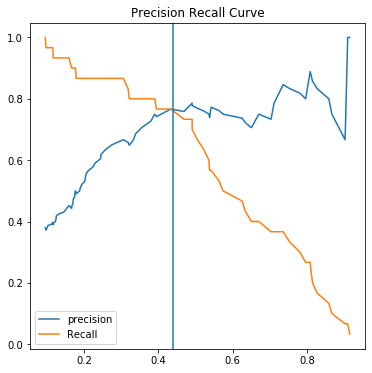

In [85]:
plt.figure(figsize=(6,6))
sns.lineplot(x=th,y=p[:-1],label='precision')
sns.lineplot(x=th,y=r[:-1],label='Recall')
plt.title('Precision Recall Curve')
plt.axvline(0.44)
plt.show()

### Checking accuracy,precision and recall

In [86]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_auc_score,f1_score 

In [89]:
def metrics(y_actual,y_proba,th):
    y_pred_temp=[1 if p>th else 0 for p in y_proba]
    recall=recall_score(y_actual,y_pred_temp)
    f1=f1_score(y_actual,y_pred_temp)
    roc_auc=roc_auc_score(y_actual,y_pred_temp)
    return {'Recall':round(recall,2),'F1_Score':round(f1,2),'ROC_AUC':round(roc_auc,2)}

In [90]:
print("Train Data")
print(metrics(y_train,y_train_proba,0.44))
print("Test Data")
print(metrics(y_test,y_test_proba,0.44))

Train Data
{'Recall': 0.73, 'F1_Score': 0.75, 'ROC_AUC': 0.83}
Test Data
{'Recall': 0.71, 'F1_Score': 0.8, 'ROC_AUC': 0.83}


### Plotting ROC-AUC Curve

In [91]:
from sklearn.metrics import roc_curve,auc

In [92]:
fpr,tpr,th=roc_curve(y_train,y_train_proba)

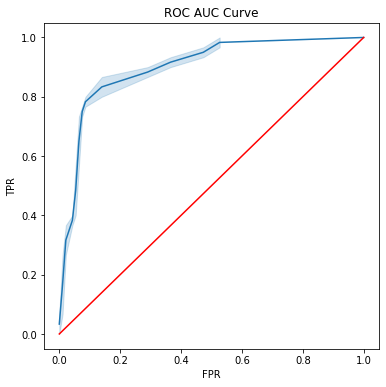

In [93]:
plt.figure(figsize=(6,6))
sns.lineplot(x=fpr,y=tpr)
sns.lineplot(x=[0.0,1],y=[0.0,1],color='red',linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC AUC Curve')
plt.show()

In [ ]:
print("Train Data")
print(metrics(y_train,y_train_proba,0.44))
print("Test Data")
print(metrics(y_test,y_test_proba,0.44))

### As,our data is imbalanced we can not rely on accuracy_score as it works perfectly only when data is balanced.

## 1)f1_score also works when we have imbalanced dataset, so we need to use f1_score.

## 2)ROC-AUC curve is needed to increase or decrease threshold be use ROC-AUC curve.

## 3)PR curve is needed to find threshold we need PR curve.

## 4)Recall is needed to decrease false negative rate.